# Chapter 4 Graphene relatives
## 1. Graphene
Firstly we will show the atomic structure og graphene, in which carbon atoms are arranged in 2D honeycomb attice.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

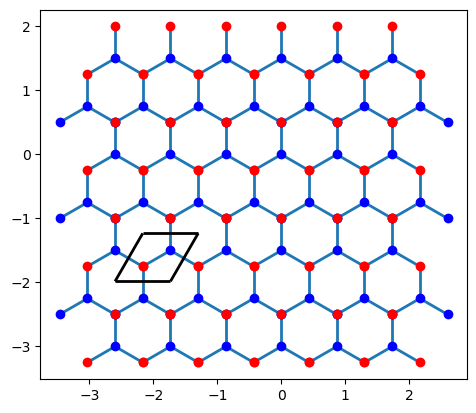

In [2]:
a = 0.5
x0 = [i*np.sqrt(3)*a for i in range(-3, 3)]
x1 = [i*np.sqrt(3)*a + np.sqrt(3)*a/2 for i in range(-4, 3)]
y0 = [ 2*j*1.5*a for j in range(-2, 2)]
y1 = [(2*j+1)*1.5*a for j in range(-2, 1)]
lines = []
set1 = [[],[]]
set2 = [[],[]]
unit_cell = []
for y in y0:
    for x in x0:
        lines.append([(x, y), (x, y + a)])
        lines.append([(x, y), (x-np.sqrt(3)*a/2, y-a/2)])
        lines.append([(x, y), (x+np.sqrt(3)*a/2, y-a/2)])
        set1[0].append(x)
        set1[1].append(y)
        set2[0].append(x)
        set2[1].append(y + a)
        set2[0].append(x-np.sqrt(3)*a/2)
        set2[1].append(y-a/2)
        set2[0].append(x+np.sqrt(3)*a/2)
        set2[1].append(y-a/2)

for y in y1:
    for x in x1:
        lines.append([(x, y), (x, y + a)])
        lines.append([(x, y), (x-np.sqrt(3)*a/2, y-a/2)])
        lines.append([(x, y), (x+np.sqrt(3)*a/2, y-a/2)])
        set1[0].append(x)
        set1[1].append(y)
        set1[0].append(x-np.sqrt(3)*a/2)
        set1[1].append(y-a/2)
        set1[0].append(x+np.sqrt(3)*a/2)
        set1[1].append(y-a/2)

unit_cell.append([(set1[0][0], set1[0][1]-a/2), (set1[0][0] + np.sqrt(3)*a, set1[0][1]-a/2)])
unit_cell.append([(set1[0][0] + np.sqrt(3)*a/2, set1[0][1]+a), (set1[0][0] + np.sqrt(3)*a/2+ np.sqrt(3)*a, set1[0][1]+a)])
unit_cell.append([(set1[0][0], set1[0][1]-a/2), (set1[0][0] + np.sqrt(3)*a/2, set1[0][1]+a)])
unit_cell.append([(set1[0][0] + np.sqrt(3)*a, set1[0][1]-a/2), (set1[0][0] + np.sqrt(3)*a/2+ np.sqrt(3)*a, set1[0][1]+a)])    
lc = mc.LineCollection(lines, linewidths=2)
uc = mc.LineCollection(unit_cell, linewidths=2, color = "black")
fig = plt.figure()
ax = fig.add_subplot(aspect='1')
ax.add_collection(lc)
ax.add_collection(uc)
ax.scatter(set1[0], set1[1], color = "blue", zorder = 2)
ax.scatter(set2[0], set2[1], color = "red", zorder = 2)

ax.autoscale()

The black rhombus indicates the unit cell. In this structure, there are two kinds of atoms in the cell. Includng the cell label, we can abel each red and blue atom as $(n_x, n_y, 0)$ and $(n_x, n_y, 1)$. These atoms interact with:
- red: $(n_x, n_y, 0)$ interact with $(n_x-1, n_y, 1)$, $(n_x, n_y -1, 1)$, $(n_x, n_y, 0)$
- blue: $(n_x, n_y, 1)$ interact with $(n_x + 1, n_y, 0)$, $(n_x, n_y +1, 0)$, $(n_x, n_y, 0)$


Usign this labeling, we can construct a Hamiltonian as follows:


In [3]:
def calc_HGraphene(Nx,Ny,μ):
    N = Nx*Ny*2
    mat_Htb = np.zeros((N,N))   
    mat_Htb += (-μ)*np.eye(N)
    t = -1.0

    for nx in range(Nx):
        for ny in range(Ny):            
            for dx in (-1, 0, 1):
                for dy in (-1, 0, 1):
                    jx = nx + dx
                    if jx > Nx -1:
                        jx = 0
                    if jx < 0:
                        jx = Nx -1
                    jy = ny + dy
                    if jy > Ny -1 :
                        jy = 0
                    if jy < 0:
                        jy = Ny -1
                        
                    for a in (0,1):
                        if a == 0:
                            b = 1
                        else:
                            b = 0
                        ii = (ny*Nx+nx)*2+a
                        jj = (jy*Nx+jx)*2+b

                        if dx == 0 and dy == 0:
                            mat_Htb[ii,jj] = t
                        elif dx == +1 and dy==0 and a ==1:
                            mat_Htb[ii,jj] = t
                        elif dx == 0 and dy == 1 and a ==1:
                            mat_Htb[ii,jj] = t
                        elif dx == -1 and dy ==0 and a ==2:
                            mat_Htb[ii,jj] = t
                        elif dx ==0 and dy == -1 and a ==2:
                            mat_Htb[ii,jj] = t
    return mat_Htb

Let us see the density of state by diagonalization.

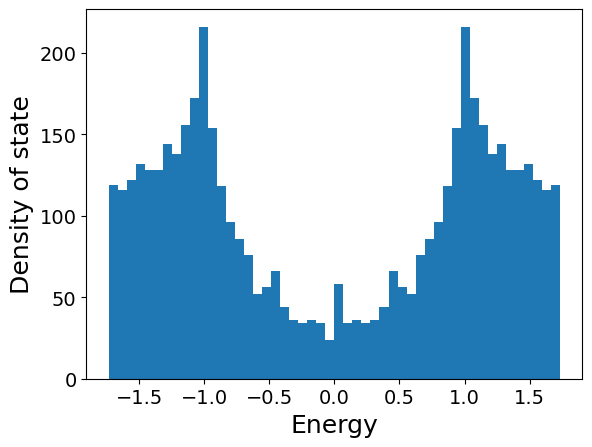

In [5]:
Nx = 50
Ny = 50
μ = 0
mat_H = calc_HGraphene(Nx,Ny,μ)
#print(mat_H)

energy, mat_v  = np.linalg.eig(mat_H)
ind = np.argsort(energy)
energy = energy[ind]
mat_v = mat_v.T[ind]

plt.hist(energy, bins = 50)
plt.xlabel("Energy", fontsize = 18)
plt.ylabel("Density of state", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()


The analytical solution is expressed by 
$$
E = \pm t\sqrt{3+2\cos(k_x) + 4\cos(k_y\frac{\sqrt{3}}{2})\cos(\frac{k_x}{2})}
$$
Let us draw the analytical band structure.

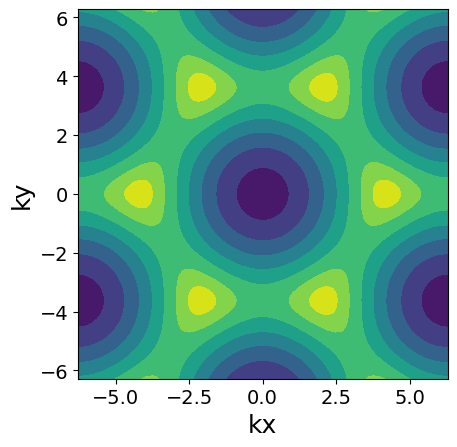

In [6]:
def func_gra_test(kx, ky, pm = -1):
    f = pm*np.sqrt(3 + 2*np.cos(kx)+4*np.cos(np.sqrt(3)/2*ky)*np.cos(kx/2))
    return f

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
z = func_gra_test(X, Y)

plt.contourf(X, Y, z)
plt.gca().set_aspect('equal')
plt.xlabel("kx", fontsize = 18)
plt.ylabel("ky", fontsize = 18)
plt.tick_params(labelsize=14)

Let us try drawing the band by diagonalization.

C:\Users\k708a\AppData\Local\Temp\ipykernel_23608\1515946567.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  band[j][i] = energy[0]


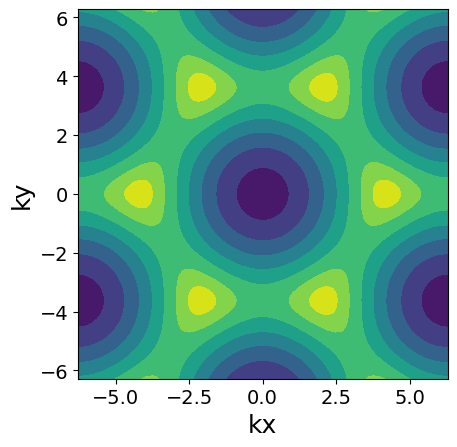

In [8]:
def calc_HGraphenekxky_test(kx,ky,μ):
    N = 2
    mat_Htb = np.zeros((N,N), dtype=complex)   
    mat_Htb += (-μ)*np.eye(N)
    t = -1.0
    c = np.sqrt(3)/2
 
    for a in (0, 1):
        if a == 0:
            b = 1
        else:
            b = 0
        ii = a
        jj = b
        if a == 0:
            mat_Htb[ii,jj] = t+t*np.exp(complex(0, -kx))+t*np.exp(complex(0,-ky*c))*np.exp(complex(0,-kx/2))                    
        elif a ==1:
            mat_Htb[ii,jj] = t+t*np.exp(complex(0, kx))+t*np.exp(complex(0, ky*c))*np.exp(complex(0,kx/2))
    return mat_Htb


kx = np.linspace(-2*np.pi, 2*np.pi, 100)
ky = np.linspace(-2*np.pi, 2*np.pi, 100)
kX, kY = np.meshgrid(kx, ky)
band = np.zeros((len(ky), len(kx)))
for i in range(len(kx)):
    for j in range(len(ky)):
        x = kx[i]
        y = ky[j]
        mat_H = calc_HGraphenekxky_test(x,y,μ)
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        band[j][i] = energy[0]

plt.contourf(kX, kY, band)
plt.gca().set_aspect('equal')
plt.xlabel("kx", fontsize = 18)
plt.ylabel("ky", fontsize = 18)
plt.tick_params(labelsize=14)


We will draw the band structure along $\Gamma-K-M$.

100


C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


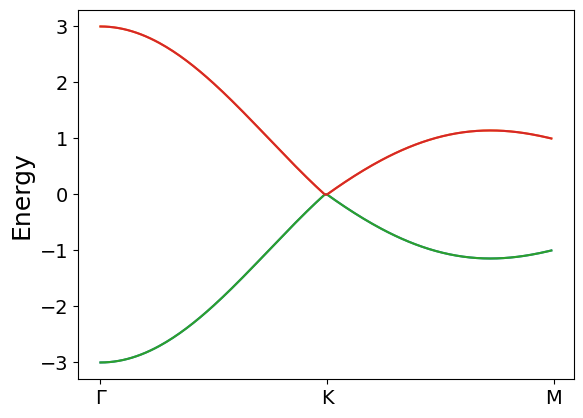

In [9]:
#G=(0,0), K = (4/3pi, 0), M = (pi, pi)
kx1 = np.linspace(0,4/3*np.pi, 100)
ky1 = np.zeros(100)
kx2 = np.linspace(4/3*np.pi,np.pi, 100)
ky2 = np.linspace(0,np.pi, 100)

kx = np.concatenate([kx1, kx2])
ky = np.concatenate([ky1, ky2])
band_down = []
band_up = []

# analytical
z_down = func_gra_test(kx, ky, -1)
z_up = func_gra_test(kx, ky, 1)
print(len(z))
# Diagonalization 
for x, y in zip(kx, ky):
    mat_H = calc_HGraphenekxky_test(x,y,0)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    band_down.append(energy[0])
    band_up.append(energy[1])

plt.plot(z_down, label = "Analytical")
plt.plot(z_up, label = "Analytical")
plt.plot(band_down, label = "Diagonaliza")
plt.plot(band_up, label = "Diagonaliza")
plt.ylabel("Energy", fontsize = 18)
plt.xticks([0, 100, 200], ["Γ", "K", "M"], fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

## 2. Zigzag nanoribbon

Let us think about a nanoribbon of graphene. The following code produces the atomic arrangement of zigzag nanoribbon.

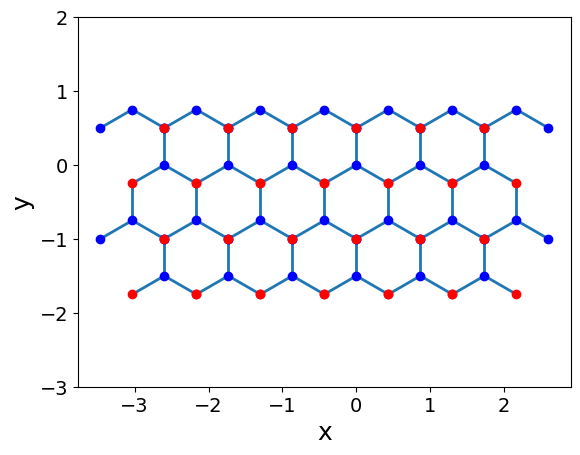

In [21]:
a = 0.5
x0 = [i*np.sqrt(3)*a for i in range(-3, 3)]
x1 = [i*np.sqrt(3)*a + np.sqrt(3)*a/2 for i in range(-4, 3)]
y0 = [ 2*j*1.5*a for j in range(-1, 1)]
y1 = [(2*j+1)*1.5*a for j in range(-1, 1)]
lines = []
set1 = [[],[]]
set2 = [[],[]]
unit_cell = []
for y in y0:
    for x in x0:
        lines.append([(x, y), (x, y + a)])
        lines.append([(x, y), (x-np.sqrt(3)*a/2, y-a/2)])
        lines.append([(x, y), (x+np.sqrt(3)*a/2, y-a/2)])
        set1[0].append(x)
        set1[1].append(y)
        set2[0].append(x)
        set2[1].append(y + a)
        set2[0].append(x-np.sqrt(3)*a/2)
        set2[1].append(y-a/2)
        set2[0].append(x+np.sqrt(3)*a/2)
        set2[1].append(y-a/2)

for y in y1:
    for x in x1:
        if y != y1[-1]:
            lines.append([(x, y), (x, y + a)])
        lines.append([(x, y), (x-np.sqrt(3)*a/2, y-a/2)])
        lines.append([(x, y), (x+np.sqrt(3)*a/2, y-a/2)])
        set1[0].append(x)
        set1[1].append(y)
        set1[0].append(x-np.sqrt(3)*a/2)
        set1[1].append(y-a/2)
        set1[0].append(x+np.sqrt(3)*a/2)
        set1[1].append(y-a/2)


lc = mc.LineCollection(lines, linewidths=2)
uc = mc.LineCollection(unit_cell, linewidths=2, color = "black")
fig = plt.figure()
ax = fig.add_subplot(aspect='1')
ax.add_collection(lc)
ax.add_collection(uc)
ax.set_xlabel("x", fontsize= 18)
ax.set_ylabel("y", fontsize= 18)
ax.scatter(set1[0], set1[1], color = "blue", zorder = 2)
ax.scatter(set2[0], set2[1], color = "red", zorder = 2)
plt.ylim(-3, 2)
plt.tick_params(labelsize=14)
plt.show()


We will construct a Hamiltonian for the nanoribbon. We apply Fourier transform in $x$ direction. The ribbon can be prepared by removing the periodic boundary condition in y direction.

In [10]:
def calc_HGraphenekx_w(kx,Ny,μ, boundary = True):
    N = Ny*2
    mat_Htb = np.zeros((N,N), dtype = complex)   
    mat_Htb += (-μ)*np.eye(N)
    t = -1.0
    for m in range(Ny):            
        for dy in (-1, 0, 1):
            jy = m + dy 
            if boundary:
                if jy > Ny -1:
                    jy = 0
                if jy < 0:
                    jy = Ny -1
            for a in (0, 1):
                if a == 0:
                    b = 1
                else:
                    b = 0
                ii = m*2+a
                jj = jy*2+b
                if 0 <= jy and jy <= Ny -1:#if the label is out of the ribbon, it is ignored.
                    if dy == 0 and a == 0:
                        mat_Htb[ii,jj] = t+t*np.exp(complex(0,-kx))                        
                    elif dy == 1 and a ==0:
                        mat_Htb[ii,jj] = t
                    elif dy ==0 and a ==1:
                        mat_Htb[ii,jj] = t+t*np.exp(complex(0,kx))
                    elif dy == -1 and a ==1:
                        mat_Htb[ii,jj] = t
    return mat_Htb


The eigen values with boudary condition is 

C:\Users\k708a\AppData\Local\Temp\ipykernel_23608\3168507477.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


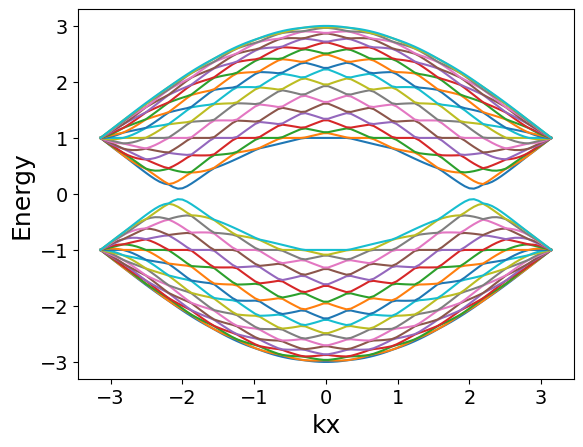

In [15]:
μ=0.0
Ny = 20
nkx = 100
vkx = np.linspace(-np.pi, np.pi, nkx)
ep = np.zeros((nkx,Ny*2))
cnt = 0
for kx in vkx:
    mat_H = calc_HGraphenekx_w(kx,Ny,μ)    
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    mat_v = mat_v.T[ind]
    for i in range(Ny*2):
        ep[cnt,i] = energy[i]
    cnt += 1

plt.rcParams.update(plt.rcParamsDefault)
plt.plot(vkx,ep)
plt.ylabel("Energy", fontsize = 18)
plt.xlabel("kx", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

The eigenenergies can be calculated by diagonalizaton as follows:

C:\Users\k708a\AppData\Local\Temp\ipykernel_23608\406258861.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


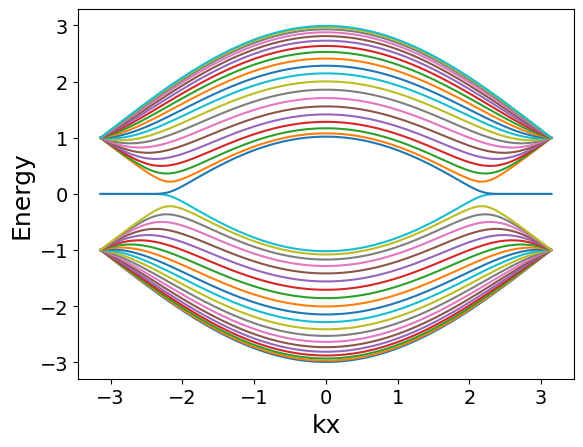

In [16]:
μ=0.0
Ny = 20
nkx = 100
vkx = np.linspace(-np.pi, np.pi, nkx)
ep = np.zeros((nkx,Ny*2))
cnt = 0
for kx in vkx:
    mat_H = calc_HGraphenekx_w(kx,Ny,μ, False)    
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    mat_v = mat_v.T[ind]
    for i in range(Ny*2):
        ep[cnt,i] = energy[i]
    cnt += 1

plt.rcParams.update(plt.rcParamsDefault)
plt.plot(vkx,ep)
plt.ylabel("Energy", fontsize = 18)
plt.xlabel("kx", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

There appears two flat band near the Fermi level. We will plot the distribution of the wavefunction by plotting the eigenvectors correponding to the flatband ($k \sim\pi$ and $m = Ny$ and $Ny-1$, correspnding to the $Ny$ and $Ny-1$ th band in totally $2Ny$ bands).

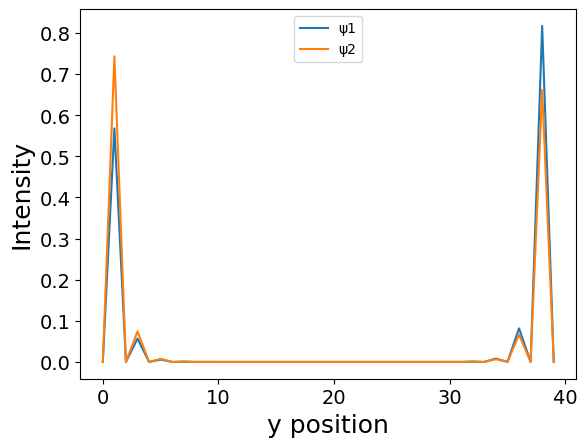

In [19]:
# calculate the eignevalues corresponding to the wavenumber with flatband
kx = np.pi-0.1
Ny = 20
mat_H = calc_HGraphenekx_w(kx,Ny,μ, False)
energy, mat_v  = np.linalg.eig(mat_H)
ind = np.argsort(energy)
energy = energy[ind]
mat_v = mat_v.T[ind]

yv = []
ψ1_real = []
ψ1_img = []
ψ2_real = []
ψ2_img = []
ψ1_abs = []
ψ2_abs = []
for i in range(Ny*2):
    yv.append(i)
    ψ1_real.append(mat_v[Ny][i].real)
    ψ2_real.append(mat_v[Ny-1][i].real)
    ψ1_img.append(mat_v[Ny][i].imag)
    ψ2_img.append(mat_v[Ny-1][i].imag)
    ψ1_abs.append(np.abs(mat_v[Ny][i]))
    ψ2_abs.append(np.abs(mat_v[Ny-1][i]))
"""
plt.plot(yv, ψ1_real, label = "1 real")
plt.plot(yv, ψ1_img, label = "1 imag")
plt.plot(yv, ψ2_real, label = "2 real")
plt.plot(yv, ψ2_img, label = "2 imag")
"""
plt.plot(yv, ψ1_abs, label = "ψ1")
plt.plot(yv, ψ2_abs, label = "ψ2")               
plt.xlabel("y position", fontsize = 18)
plt.ylabel("Intensity", fontsize = 18)
plt.tick_params(labelsize=14)
plt.legend()
plt.show()

We plot two states corresponding to the flat band. The intensity of the wave function is high at the edge of the ribbon, indicating that the band is localized at the edge of the ribbon. Threfore, the state is called edge state. 

## 3. Armchair nanoribbon

Let us think about a nanoribbon of graphene. The following code produces the atomic arrangement of zigzag nanoribbon.

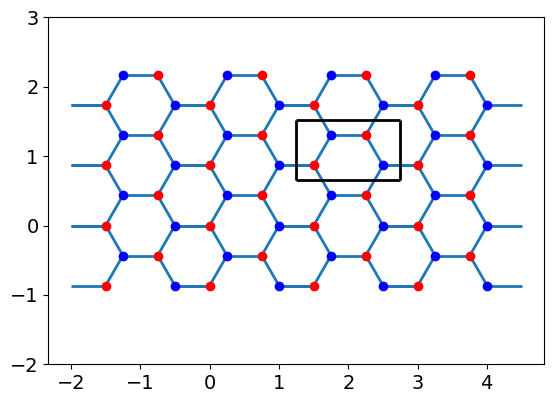

In [27]:
a = 0.5
ux = [3*a*i for i in range(-1, 3)]
uy = [np.sqrt(3)*a*i for i in range(-1, 3)]
lines = []
xr = []
yr = []
xb = []
yb = []
uc_lines = [[(3*a-a/2, np.sqrt(3)*a -  np.sqrt(3)/4*a), (6* a-a/2, np.sqrt(3)*a-  np.sqrt(3)/4*a)]]
uc_lines.append([(3*a-a/2, np.sqrt(3)*a-  np.sqrt(3)/4*a), (3*a-a/2, 2*np.sqrt(3)*a-  np.sqrt(3)/4*a)])
uc_lines.append([(3*a-a/2, 2*np.sqrt(3)*a-  np.sqrt(3)/4*a), (6*a-a/2, 2*np.sqrt(3)*a-  np.sqrt(3)/4*a)])      
uc_lines.append([(6*a-a/2, 2*np.sqrt(3)*a-  np.sqrt(3)/4*a), (6* a-a/2, np.sqrt(3)*a-  np.sqrt(3)/4*a)])        
            

for x in ux:
    for y in uy:
        xr.append(x)
        yr.append(y)
        xr.append(x+1.5*a)
        yr.append(y + np.sqrt(3)/2*a)
        xb.append(x+a/2)
        yb.append(y + np.sqrt(3)/2*a)
        xb.append(x+2*a)
        yb.append(y)
        lines.append([(x, y), (x + a/2, y + np.sqrt(3)/2*a)])
        if y != uy[-1]:
            lines.append([(x + a/2, y + np.sqrt(3)/2*a), (x, y +np.sqrt(3)*a)])
            lines.append([(x + 1.5 * a, y + np.sqrt(3)/2*a), (x + 2* a, y +np.sqrt(3)*a)])
            lines.append([(x-a, y + np.sqrt(3)*a), (x, y + np.sqrt(3)*a)])
        lines.append([(x + a/2, y + np.sqrt(3)/2*a), (x + 1.5 * a, y + np.sqrt(3)/2*a)])

        lines.append([(x + 1.5 * a, y + np.sqrt(3)/2*a), (x + 2* a, y)])
        lines.append([(x- a, y), (x, y)])

        lines.append([(x + 2*a, y), (x + 3*a, y)])
        lines.append([(x + 2*a, y + np.sqrt(3)*a), (x + 2*a, y + np.sqrt(3)*a)])

lc = mc.LineCollection(lines, linewidths=2)
uc = mc.LineCollection(uc_lines, linewidths=2, color = "black")
fig = plt.figure()
ax = fig.add_subplot(aspect='1')
ax.add_collection(lc)
ax.add_collection(uc)
ax.scatter(xb, yb, color = "blue", zorder = 2)
ax.scatter(xr, yr, color = "red", zorder = 2)
plt.ylim(-2, 3)
plt.tick_params(labelsize=14)
plt.show()



The crystalic orientation of the honeycomb lattice is 90 degrees rotated, and the atomic arrangement of th eedge si different from the zigzag type. This type of ribbon is called "armchair edge". For treating the armchair edge, it is combanient to use the rhombohedra unitcell includigng four atoms in a cell. We will abel the atoms in the unit cell as 0-3. The atoms in the (n, m) cell interact with the following atoms:
- $(n, m, 0)$: $(n-1, m, 3)$, $(n, m, 1)$, and $(n, m-1, 1)$.
- $(n, m, 1)$: $(n, m, 0)$, $(n, m+1, 0)$, and $(n, m, 2)$.
- $(n, m, 2)$: $(n, m, 1)$, $(n, m+1, 3)$, and $(n, m, 3)$.
- $(n, m, 3)$: $(n, m, 2)$, $(n, m-1, 2)$, and $(n + 1, m, 0)$.


Firstly let us consider the Hamiltonian for graphene (not nanoribbon), using the rhoumbohedral cell.

In [28]:
def calc_HGrapheneA(Nx,Ny,μ):
    N = Nx*Ny*4 # 4 atoms in a cell
    mat_Htb = np.zeros((N,N))   
    mat_Htb += (-μ)*np.eye(N)
    t = -1.0

    for n in range(Nx):
        for m in range(Ny):
            for dx in (-1, 0, 1):
                for dy in (-1, 0, 1):
                    jx = n + dx
                    jy = m + dy
                    # Consider the periodic boundary consition
                    if jx > Nx -1:
                        jx = 0
                    if jx < 0:
                        jx = Nx -1                  
                    if jy > Ny -1:
                        jy = 0
                    if jy < 0:
                        jy = Ny -1   

                    for a in range(4):
                        for b in range(4):
                            hop = False
                            ii = (m*Nx+n)*4+a
                            if a == 0:
                                if dx == -1 and dy==0 and b==3:
                                    hop = True
                                elif dx==0 and dy==0 and b==1:
                                    hop = True
                                elif dx==0 and dy== -1 and b==1:
                                    hop = True

                            elif a ==1:
                                if dx==0 and dy==0 and b==0:
                                    hop = True
                                elif dx==0 and dy== 1 and b==0:
                                    hop = True
                                elif dx==0 and dy==0 and b==2:
                                    hop = True
                                    
                            elif a ==2:
                                if dx==0 and dy==0 and b==1:
                                    hop = True
                                elif dx==0 and dy== 1 and b==3:
                                    hop = True
                                elif dx==0 and dy==0 and b==3:
                                    hop = True
                                    
                            elif a ==3:
                                if dx==0 and dy==0 and b==2:
                                    hop = True
                                elif dx==0 and dy== -1 and b==2:
                                    hop = True
                                elif dx==1 and dy==0 and b==0:
                                    hop = True
                
                            if hop and 0 <= jx and jx <= Nx -1 and 0 <= jy and jy <= Ny-1:
                                jj = (jy*Nx+jx)*4+b                                                                                     
                                mat_Htb[ii,jj] = t
                   
    return mat_Htb

We can plot the DOS.

C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\k708a\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6857: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


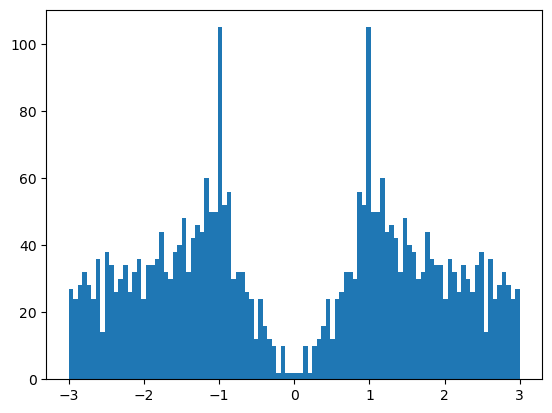

In [29]:
Nx = 20
Ny = 40
μ = 0
mat_H = calc_HGrapheneA(Nx,Ny,μ)
#println(mat_H)

energy, mat_v  = np.linalg.eig(mat_H)
ind = np.argsort(energy)
energy = energy[ind]
mat_v = mat_v.T[ind]


plt.hist(energy,bins=100)
plt.show()

We perform Fourier transform in $x$ direction. The following part constructs the matrix for armchair nanoribbons.

In [30]:
def calc_HGrapheneAkx(kx,Ny,μ, boundary = True):
    N = Ny*4
    mat_Htb = np.zeros((N,N), dtype = complex)   
    mat_Htb += (-μ)*np.eye(N)
    t0 = 1.0
    for iy in range(Ny):
        for dy in (-1, 0, 1):     
            jy = iy + dy
            if boundary:
                if jy > Ny -1:
                    jy = 0
                if jy < 0:
                    jy = Ny -1
            for a in range(4):
                for b in range(4):
                    hop = False
                    t = 0.0
                    ii = iy*4+a
                    if a == 0:
                        if dy==0 and b==3:
                            hop = True
                            t += t0*np.exp(complex(0, -kx))
                        elif dy==1 and b==1:
                            hop = True
                            t += t0
                        elif dy==0 and b==1:
                            hop = True
                            t += t0

                    elif a ==1:
                        if dy==0 and b==0:
                            hop = True
                            t += t0
                        elif dy==0 and b==2:
                            hop = True
                            t += t0
                        elif dy==-1 and b==0:
                            hop = True
                            t += t0

                    elif a == 2:
                        if dy==0 and b==1:
                            hop = True
                            t += t0
                        elif dy==0 and b==3:
                            hop = True
                            t += t0
                        elif dy==-1 and b==3:
                            hop = True
                            t += t0
                        
                    elif a ==3:
                        if dy==0 and b==2:
                            hop = True
                            t += t0
                        elif dy==0 and b==0:
                            hop = True
                            t += t0*np.exp(complex(0, kx))
                        elif dy==1 and b==2:
                            hop = True
                            t += t0
                            
                    if hop and 0 <= jy and jy <= Ny -1:
                        jj = jy*4+b                                                                                     
                        mat_Htb[ii,jj] = t
    
    return mat_Htb


C:\Users\k708a\AppData\Local\Temp\ipykernel_23608\211729768.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


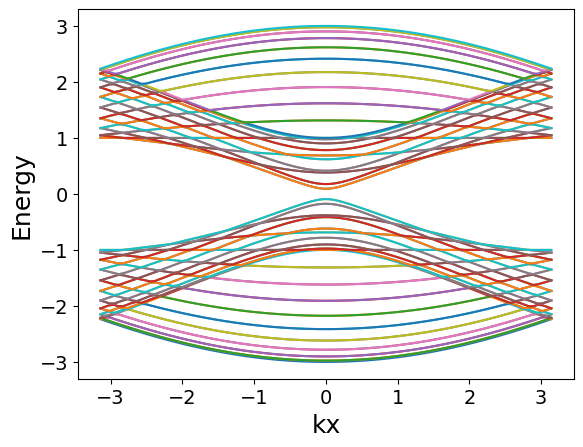

In [31]:
μ=0.0
Ny = 20
nkx = 100


vkx = np.linspace(-np.pi, np.pi, nkx)
ep = np.zeros((nkx,Ny*4))
cnt = 0
for kx in vkx:  
    mat_H = calc_HGrapheneAkx(kx,Ny,μ)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    mat_v = mat_v.T[ind]
    
    for i in range(Ny*4):
        #println(energy[i])
        ep[cnt,i] = energy[i]
    cnt += 1

plt.plot(vkx,ep)
plt.ylabel("Energy", fontsize = 18)
plt.xlabel("kx", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

C:\Users\k708a\AppData\Local\Temp\ipykernel_23608\2343296430.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


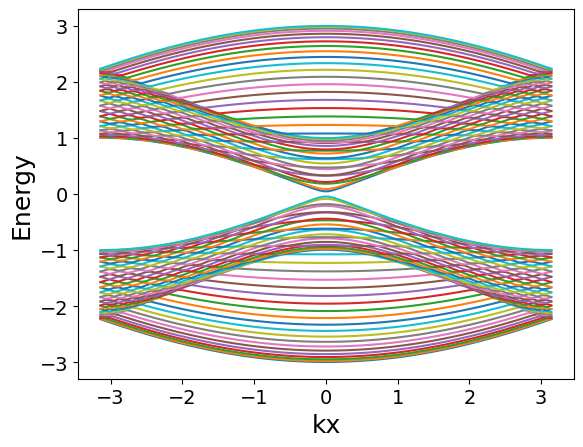

In [32]:
μ=0.0
Ny = 20
nkx = 100


vkx = np.linspace(-np.pi, np.pi, nkx)
ep = np.zeros((nkx,Ny*4))
cnt = 0
for kx in vkx:  
    mat_H = calc_HGrapheneAkx(kx,Ny,μ, False)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    mat_v = mat_v.T[ind]
    
    for i in range(Ny*4):
        #println(energy[i])
        ep[cnt,i] = energy[i]
    cnt += 1

plt.plot(vkx,ep)
plt.ylabel("Energy", fontsize = 18)
plt.xlabel("kx", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()